In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
from multinterp.rectilinear._multi import MultivariateInterp

Consider the following function along with its analytical derivatives:


In [2]:
def trig_func(x, y):
    return y * np.sin(x) + x * np.cos(y)


def trig_func_dx(x, y):
    return y * np.cos(x) + np.cos(y)


def trig_func_dy(x, y):
    return np.sin(x) - x * np.sin(y)

First, we create a sample input gradient and evaluate the function at those points. Notice that we are not using the analytical derivatives to create the interpolation function. Instead, we will use these to compare the results of the numerical derivatives.


In [3]:
x_grid = np.geomspace(1, 11, 1000) - 1
y_grid = np.geomspace(1, 11, 1000) - 1
x_mat, y_mat = np.meshgrid(x_grid, y_grid, indexing="ij")

z_mat = trig_func(x_mat, y_mat)

Now, we generate a different grid which will be used as our query points.


In [4]:
x_new, y_new = np.meshgrid(
    np.linspace(0, 10, 1000),
    np.linspace(0, 10, 1000),
    indexing="ij",
)

Now, we can compare our interpolation function with the analytical function, and see that these are very close to each other.


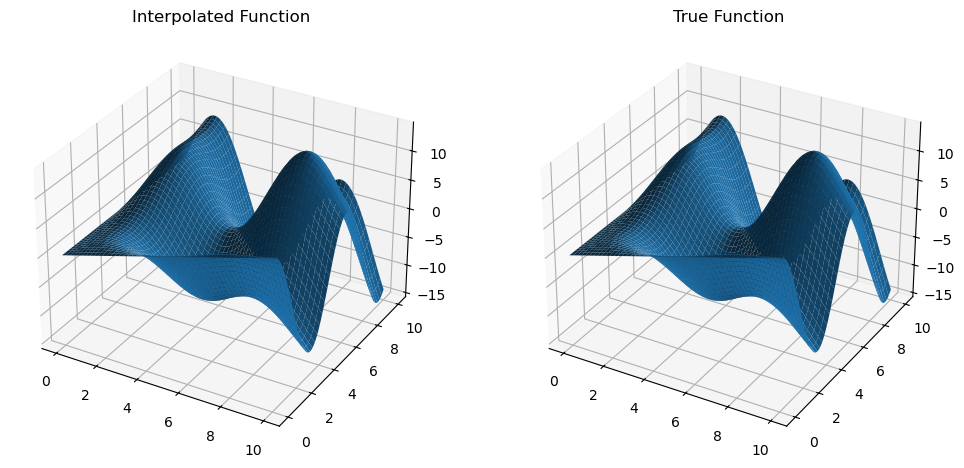

In [5]:
#| label: fig:multivariate

mult_interp = MultivariateInterp(z_mat, [x_grid, y_grid], backend="cupy")
z_mult_interp = mult_interp(x_new, y_new).get()
z_true = trig_func(x_new, y_new)

# Create a figure with two subplots
fig = plt.figure(figsize=(12, 6))

# Plot the interpolated function
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_surface(x_new, y_new, z_mult_interp)
ax1.set_title("Interpolated Function")

# Plot the true function
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(x_new, y_new, z_true)
ax2.set_title("True Function")

plt.show()

To evaluate the numerical derivatives, we can use the method `.diff(argnum)` of `MultivariateInterp` which provides an object oriented way to compute numerical derivatives. For example, calling `mult_interp.diff(0)` returns a `MultivariateInterp` object that represents the numerical derivative of the function with respect to the first argument on the same input grid.

We can now compare the numerical derivatives with the analytical derivatives, and see that these are indeed very close to each other.


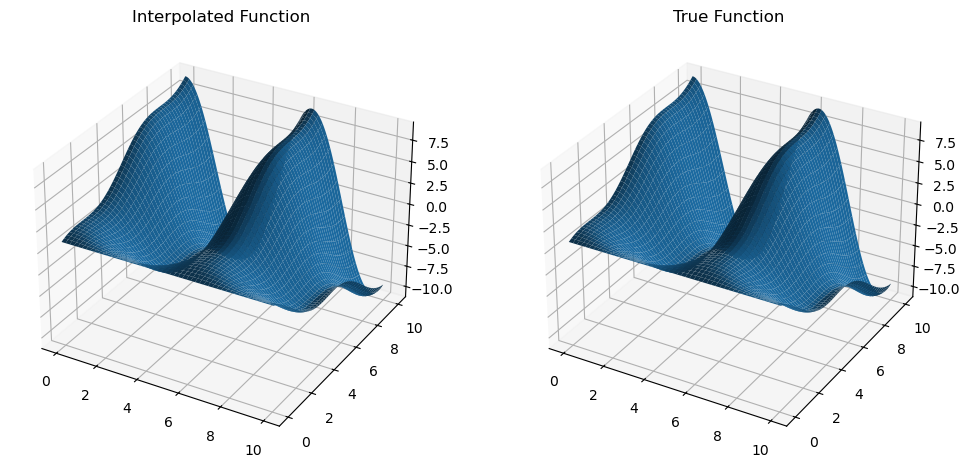

In [6]:
#| label: fig:multivariate_dx

dfdx = mult_interp.diff(0)
z_dfdx = dfdx(x_new, y_new).get()
dfdx_true = trig_func_dx(x_new, y_new)

# Create a figure with two subplots
fig = plt.figure(figsize=(12, 6))

# Plot the interpolated function
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_surface(x_new, y_new, z_dfdx)
ax1.set_title("Interpolated Function")

# Plot the true function
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(x_new, y_new, dfdx_true)
ax2.set_title("True Function")

plt.show()

Similarly, we can compute the derivatives with respect to the second argument, and see that it produces an accurate result.


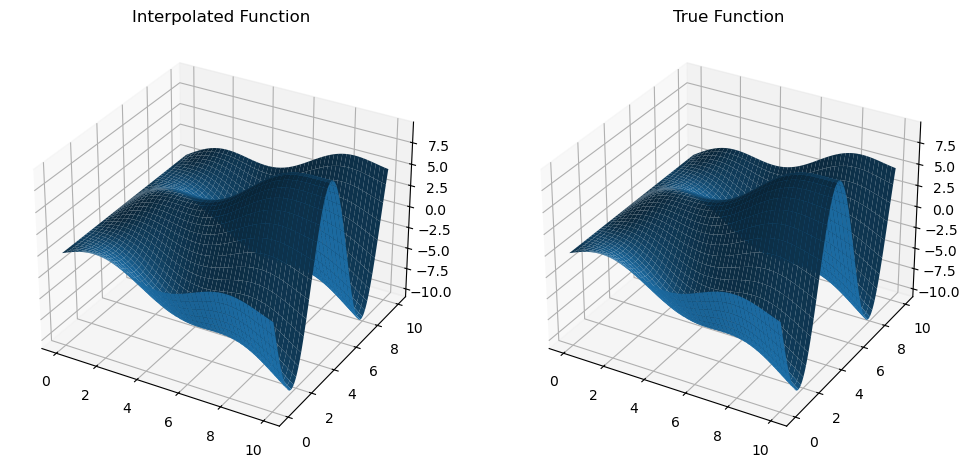

In [7]:
#| label: fig:multivariate_dy

dfdy = mult_interp.diff(1)
z_dfdy = dfdy(x_new, y_new).get()
dfdy_true = trig_func_dy(x_new, y_new)

# Create a figure with two subplots
fig = plt.figure(figsize=(12, 6))

# Plot the interpolated function
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_surface(x_new, y_new, z_dfdy)
ax1.set_title("Interpolated Function")

# Plot the true function
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(x_new, y_new, dfdy_true)
ax2.set_title("True Function")

plt.show()

The choice of returning object oriented intepolation functions for the numerical derivatives is very useful, as it allows for re-usability without re-computation and easy chaining of operations. For example, we can compute the second derivative of the function with respect to the first argument by calling `mult_interp.diff(0).diff(0)`.
